[31 52 52 96 72 33  7 91 21 57]
[ 5 62 74 31 18 72 77 90 17 52]
619.0
Distance travled:  367.0
[21 31  7 57 52 52 91 96 33 72]
[17  5 77 52 62 74 90 31 72 18]


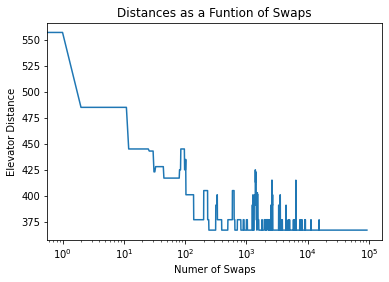

In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

N = 10 # number of people                                                                                                                                                                                
t = 0 # time                                                                                                                                                                                             
Tmax = 10 # degrees                                                                                                                                                                                      
Tmin = 1e-3 # degrees                                                                                                                                                                                    
tau = 1.e4 # set by us manually                                                                                                                                                                          
T = Tmax

# initalizing first and final floor arrays randomly                                                                                                                                                      
initalF = np.random.randint(1,101,10)
finalF = np.random.randint(1,101,10)

# if a person wants to go to a floor they're already on, re randomize                                                                                                                                    
for i in range(N):
    if initalF[i] == finalF[i]:
        initalF[i] = np.random.randint(1,101)
        print("swapped", initalF)

print(initalF)
print(finalF)

# calculating the distance between floors                                                                                                                                                                
def distance(N,a,b):# n = number of people, a = inital point, b = final point                                                                                                                            
    s = 0. #distance travled                                                                                                                                                                             
    for i in range(N): # loop through arrays to find the distances between each starting and final                                                                                                       
        # endpoint                                                                                                                                                                                       
        s += abs(b[i] - a[i]) # abs b/c you don't want a - distance                                                                                                                                      
        # everything else                                                                                                                                                                                
        if i < N -1:
            s += abs(a[i+1] - b[i])
    return s # distance value                                                                                                                                                                            

D = distance(N,initalF,finalF) # first distance value from non swapped random arrays                                                                                                                     
print(D)

D_saved = [] #initalizing D_saved array                                                                                                                                                                  

# annealing while loop                                                                                                                                                                                   
while T > Tmin:

    # starting to cool a bit                                                                                                                                                                             
    t = t+1 # time is incrementing                                                                                                                                                                       
    T = Tmax * np.exp(-t/tau)

    # picking 2 people to swap                                                                                                                                                                           
    i = np.random.randint(N) # person 1                                                                                                                                                                  
    j = np.random.randint(N) # person 2        
    
    # swapping                                                                                                                                                                                           
    initalF[i],initalF[j] = initalF[j],initalF[i] # swapping inital floors of the 2 people                                                                                                               
    finalF[i],finalF[j] = finalF[j],finalF[i] # swapping final floors of the 2 people                                                                                                                    

    swapD = distance(N,initalF,finalF) # recalculating the swapped distance                                                                                                                              
    deltaD = swapD - D # new distance - old                                                                                                                                                              

    if deltaD > 0: # if the distance isn't better, swap back and save. But with annealing sometimes you save the bad value...                                                                            

        if np.random.random() > np.exp(-deltaD/T): # draw a random number and compare to a number that is getting smaller over time. As time goes on less likely to choose a bad swap                    
            initalF[i],initalF[j] = initalF[j],initalF[i] # swapping inital floors of the 2 people                                                                                                       
            finalF[i],finalF[j] = finalF[j],finalF[i] # swapping final floors of the 2 people                                                                                                            

        D = distance(N,initalF,finalF) # recalculate distance                                                                                                                                            
        D_saved.append(D)

    else: # if the distance is better, save                                                                                                                                                              
        D = distance(N,initalF,finalF)
        D_saved.append(D)

print("Distance travled: ",D) # final optimized distance                                                                                                                                                 
print(initalF) # reordered inital floor array                                                                                                                                                            
print(finalF) # reordered final floor array                                                                                                                                                              


# plotting                                                                                                                                                                                               
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(len(D_saved)),D_saved)
ax.set_xscale('log')
plt.title('Distances as a Funtion of Swaps')
plt.xlabel('Numer of Swaps')
plt.ylabel('Elevator Distance')
fig.savefig('mcmc2.png',dpi=300)
